In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df["job_skills"] = df["job_skills"].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

# Filter for Data Analyst and jobs in the US
df_DA_US = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()

In [2]:
# Drop Nan Values from the column for plotting
df_DA_US = df_DA_US.dropna(subset=["salary_year_avg"])

In [3]:
df_DA_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,"[excel, powerpoint]","{'analyst_tools': ['excel', 'powerpoint']}"
410,Data Analyst,IT Business Lead Data Analyst - VP - Hybrid,"Atlantic Beach, FL",via ComputerJobs.com,Full-time,False,Georgia,2023-01-10 13:59:02,False,False,United States,year,133285.0,NaN,Citi,"[sql, word, excel, visio, powerpoint, sharepoint]","{'analyst_tools': ['word', 'excel', 'visio', '..."
988,Data Analyst,DATA ANALYST (ONSITE),"Springfield, MA",via Indeed,Full-time,False,"New York, United States",2023-11-21 13:00:13,False,False,United States,year,62623.0,NaN,Springfield Public Schools,"[sql, excel, tableau]","{'analyst_tools': ['excel', 'tableau'], 'progr..."
1413,Data Analyst,Junior BI Developer,"Atlanta, GA",via Ai-Jobs.net,Full-time,False,Georgia,2023-10-31 13:57:41,False,True,United States,year,71300.0,NaN,Guidehouse,"[sql, excel, power bi]","{'analyst_tools': ['excel', 'power bi'], 'prog..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782637,Data Analyst,Data Integration Analyst,"Germantown, WI",via ZipRecruiter,Full-time,False,"Illinois, United States",2023-01-20 06:18:43,True,False,United States,year,70000.0,NaN,Virtual Benefits Administrator,"[vba, sql, sql server]","{'databases': ['sql server'], 'programming': [..."
782798,Data Analyst,Reference Data Analyst,"New York, NY",via Ai-Jobs.net,Full-time,False,"New York, United States",2023-04-21 05:59:51,True,False,United States,year,111175.0,NaN,DRW,[terminal],{'other': ['terminal']}
783588,Data Analyst,Data Analytics Manager,"Chicago, IL",via Ladders,Full-time,False,"Illinois, United States",2023-01-09 06:01:18,False,False,United States,year,125000.0,NaN,"United Air Lines, Inc","[sql, r, python, hadoop, excel]","{'analyst_tools': ['excel'], 'libraries': ['ha..."
783866,Data Analyst,Lead Credit Bureau Data Analyst,"Des Plaines, IL",via Ladders,Full-time,False,"Illinois, United States",2023-06-02 06:02:06,False,True,United States,year,115000.0,NaN,Discover Financial Services,[unix],{'os': ['unix']}


In [4]:
df_DA_US["salary_year_avg"].sample(10)

32797     65000.0
109802    71500.0
662373    90000.0
227226    66400.0
81799     80000.0
632937    53957.0
320553    55000.0
452500    89833.5
461937    67500.0
561422    92500.0
Name: salary_year_avg, dtype: float64

<Axes: >

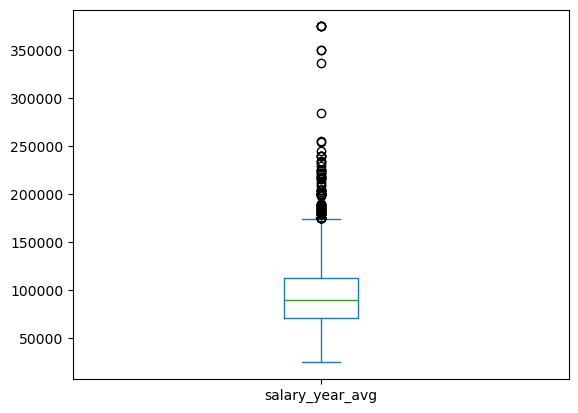

In [5]:
df_DA_US["salary_year_avg"].plot(kind="box")  # Pandas

{'whiskers': [<matplotlib.lines.Line2D at 0x1c883887510>,
 'caps': [<matplotlib.lines.Line2D at 0x1c883876d50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c881625010>],
 'medians': [<matplotlib.lines.Line2D at 0x1c8838750d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c883a1c3d0>],
 'means': []}

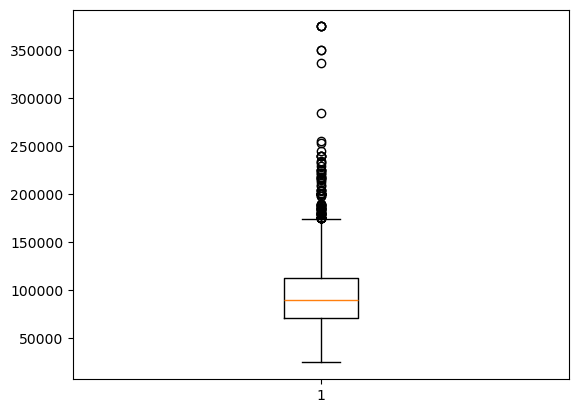

In [7]:
plt.boxplot(df_DA_US["salary_year_avg"])  # Matplot

<Axes: >

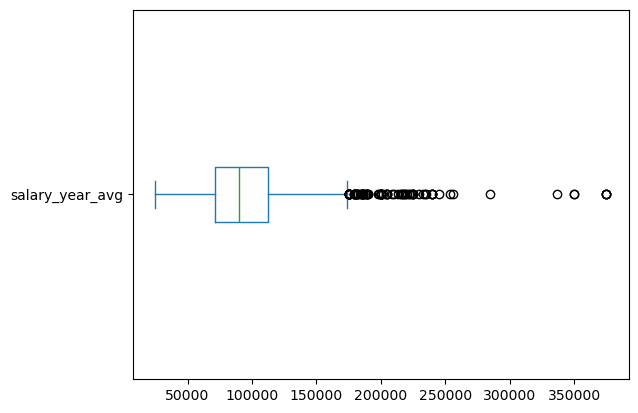

In [9]:
df_DA_US["salary_year_avg"].plot(kind="box", vert=False)  # Pandas

### Compared yearly salary for:
#### - Data Analyst
#### - Data Engineer 
#### - Data Scientists

In [16]:
# Filter only for US jobs

job_titles = ["Data Analyst", "Data Engineer", "Data Scientist"]

df_US = df[(df["job_title_short"].isin(job_titles)) & (df["job_country"] == "United States")].copy()

In [17]:
df_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","[sql, python, r, mongodb, mongodb, sql server,...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
11,Data Engineer,Data Engineer,"Colorado Springs, CO (+3 others)",via The Muse,Full-time,False,"Texas, United States",2023-11-03 13:06:51,False,True,United States,None,NaN,NaN,Philips,"[python, qlik]","{'analyst_tools': ['qlik'], 'programming': ['p..."
17,Data Scientist,Data Science Team Lead,"Laurel, MD",via APL Careers - Johns Hopkins University App...,Full-time,False,Georgia,2023-06-13 13:25:17,False,True,United States,None,NaN,NaN,Johns Hopkins Applied Physics Laboratory,"[go, apl, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"[python, matlab, r]","{'programming': ['python', 'matlab', 'r']}"
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None


In [18]:
df_US["job_title_short"].value_counts()

job_title_short
Data Analyst      67816
Data Scientist    58830
Data Engineer     35080
Name: count, dtype: int64

In [19]:
df_US["salary_year_avg"]

3              NaN
5              NaN
9              NaN
11             NaN
17             NaN
            ...   
785673         NaN
785685         NaN
785692    157500.0
785703         NaN
785705         NaN
Name: salary_year_avg, Length: 161726, dtype: float64

In [20]:
df_US = df_US.dropna(subset=["salary_year_avg"])

In [22]:
df_US["salary_year_avg"]

92        120000.0
100       228222.0
109        89000.0
116       114000.0
146       129500.0
            ...   
785563    136400.0
785624    139216.0
785641    150000.0
785648    221875.0
785692    157500.0
Name: salary_year_avg, Length: 11818, dtype: float64

In [23]:
job_list = [df_US[df_US["job_title_short"] == job_title ]["salary_year_avg"] for job_title in job_titles]
job_list

[109        89000.0
 180        90250.0
 410       133285.0
 988        62623.0
 1413       71300.0
             ...   
 782637     70000.0
 782798    111175.0
 783588    125000.0
 783866    115000.0
 784882     87500.0
 Name: salary_year_avg, Length: 4350, dtype: float64,
 92        120000.0
 146       129500.0
 307       185000.0
 339       195000.0
 380        97500.0
             ...   
 783111    125000.0
 784102     90000.0
 784191    217500.0
 785624    139216.0
 785641    150000.0
 Name: salary_year_avg, Length: 2915, dtype: float64,
 100       228222.0
 116       114000.0
 257       103128.0
 450       157500.0
 1257       70700.0
             ...   
 785324    234500.0
 785488    115000.0
 785563    136400.0
 785648    221875.0
 785692    157500.0
 Name: salary_year_avg, Length: 4553, dtype: float64]

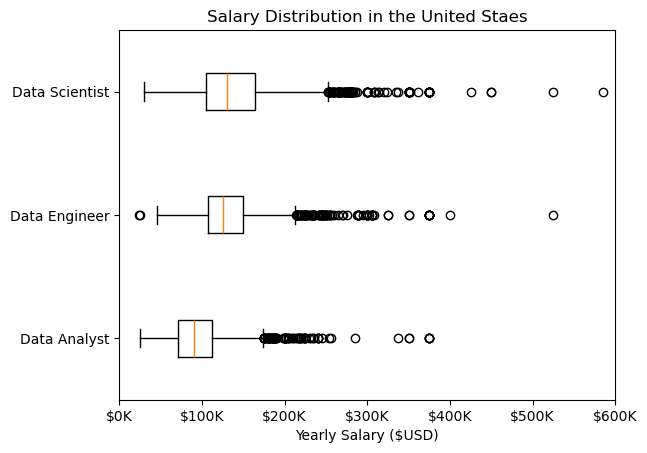

In [29]:
plt.boxplot(job_list, tick_labels=job_titles, vert=False)
plt.title("Salary Distribution in the United Staes")
plt.xlabel("Yearly Salary ($USD)")

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))
plt.xlim(0, 600000)

plt.show()